### Dimensionality reduction 

In [ ]:
from IPython.display import Image
Image(filename = "dr.png", width = 600, height = 300)

As the number of features increases, the model becomes more complex. 

The more the number of features, the more the chances of overfitting. 

A machine learning model that is trained on many features, gets increasingly dependent on the data it was trained on and in turn overfitted, resulting in poor performance on real data, beating the purpose.
dimensionality reduction advantages 

1.	Less misleading data means model accuracy improves.
2.	Less dimensions mean less computing. Less data means that algorithms train faster.
3.	Less data means less storage space required.
4.	Less dimensions allow usage of algorithms unfit for many dimensions
5.	Removes redundant features and noise.


### PCA

Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality
of data. 

It can be thought of as a projection method where data with m-columns (features) is
projected into a subspace with m or fewer columns, whilst retaining the essence of the original
data.

The PCA method can be described and implemented using the tools of linear algebra.

<b>Steps of PCA</b>

Take the whole dataset consisting of d+1 dimensions and ignore the labels such that our new dataset becomes d dimensional.

Compute the mean for every dimension of the whole dataset.

Compute the covariance matrix of the whole dataset.

Compute eigenvectors and the corresponding eigenvalues.

Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.

Use this d × k eigenvector matrix to transform the samples onto the new subspace.

PCA is an operation applied to a dataset, represented by an n x m matrix A that results in a projection of A which we will call B. 

A = (a21, a22)
     a31, a32
 
B = PCA(A)

The first step is to calculate the mean values of each column.


M = mean(A)

or 

              (a11 + a21 + a31) / 3
M(m11, m12) = (a12 + a22 + a32) / 3


Next, we need to center the values in each column by subtracting the mean column value.

C = A - M

The next step is to calculate the covariance matrix of the centered matrix C.

Correlation is a normalized measure of the amount and direction (positive or negative) that two columns change together. 

Covariance is a generalized and unnormalized version of correlation across multiple columns. 

A covariance matrix is a calculation of covariance of a given matrix with covariance scores for every column with every other column, including itself.

V = cov(C)

Finally, we calculate the eigendecomposition of the covariance matrix V. 

This results in a list of eigenvalues and a list of eigenvectors.

values, vectors = eig(V)

The eigenvectors represent the directions or components for the reduced subspace of B, whereas the eigenvalues represent the magnitudes for the directions.

The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for A.

If all eigenvalues have a similar value, then we know that the existing representation may already be reasonably compressed or dense and that the projection may offer little. 

If there are eigenvalues close to zero, they represent components or axes of B that may be discarded.

A total of m or less components must be selected to comprise the chosen subspace. 

Ideally, we would select k eigenvectors, called principal components, that have the k largest eigenvalues.

B = select(values, vectors)

In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

print('define a matrix---------- \n')
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

define a matrix---------- 

[[1 2]
 [3 4]
 [5 6]]


In [2]:
print('calculate the mean of each column---------- \n ')
M = mean(A.T, axis=1)
print(M)

calculate the mean of each column---------- 
 
[3. 4.]


In [3]:
print('center columns by subtracting column means---------- \n')
C = A - M
print(C)

center columns by subtracting column means---------- 

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


In [4]:
print('calculate covariance matrix of centered matrix---------- \n ')
V = cov(C.T)
print(V)

calculate covariance matrix of centered matrix---------- 
 
[[4. 4.]
 [4. 4.]]


In [5]:
print('eigendecomposition of covariance matrix---------- \n')
values, vectors = eig(V)
print(vectors)

eigendecomposition of covariance matrix---------- 

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [6]:
print(values)

[8. 0.]


In [7]:
print('project data---------- \n')
P = vectors.T.dot(C.T)
print(P.T)

project data---------- 

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


#### eigen  numeric example

In [ ]:
# Load library
import numpy as np

# Create matrix
matrix = np.array([[1, -1, 3],
                   [1, 1, 6],
                   [3, 8, 9]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

In [ ]:
# View eigenvalues
eigenvalues

In [ ]:
eigenvectors

Eigenvectors are widely used in machine learning libraries. Intuitively, given a linear transformation represented by a matrix, A, eigenvectors are vectors that, when that transformation is applied, change only in scale (not direction). 

More formally:
A v = λ v
where A is a square matrix, λ contains the eigenvalues and v contains the eigenvectors. 

In NumPy’s linear algebra toolset, eig lets us calculate the eigenvalues, and eigenvectors of any square matrix.

### Sklearn method

In [8]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA

# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

# create the PCA instance
pca = PCA(1)

# fit on data
pca.fit(A)

# access values and vectors
print(pca.components_)

print(pca.explained_variance_)

print(pca.explained_variance_ratio_)

# transform data
B = pca.transform(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[0.70710678 0.70710678]]
[8.]
[1.]
[[-2.82842712]
 [ 0.        ]
 [ 2.82842712]]


### PCA on IRIS dataset

In [21]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
target           object
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
# Separating out the target
y = df.loc[:,['target']].values
print(y)

[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['

In [26]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [27]:
x1 = x.copy()

In [28]:
#The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

print(principalComponents)

[[-2.26454173e+00  5.05703903e-01 -1.21943348e-01]
 [-2.08642550e+00 -6.55404729e-01 -2.27250832e-01]
 [-2.36795045e+00 -3.18477311e-01  5.14796236e-02]
 [-2.30419716e+00 -5.75367713e-01  9.88604444e-02]
 [-2.38877749e+00  6.74767397e-01  2.14278490e-02]
 [-2.07053681e+00  1.51854856e+00  3.06842583e-02]
 [-2.44571134e+00  7.45626750e-02  3.42197636e-01]
 [-2.23384186e+00  2.47613932e-01 -8.25744645e-02]
 [-2.34195768e+00 -1.09514636e+00  1.53562399e-01]
 [-2.18867576e+00 -4.48629048e-01 -2.46559522e-01]
 [-2.16348656e+00  1.07059558e+00 -2.64009373e-01]
 [-2.32737775e+00  1.58587455e-01  1.00165616e-01]
 [-2.22408272e+00 -7.09118158e-01 -2.23214514e-01]
 [-2.63971626e+00 -9.38281982e-01  1.89570030e-01]
 [-2.19229151e+00  1.88997851e+00 -4.69480095e-01]
 [-2.25146521e+00  2.72237108e+00  3.26037967e-02]
 [-2.20275048e+00  1.51375028e+00 -1.36349158e-03]
 [-2.19017916e+00  5.14304308e-01 -3.86155949e-02]
 [-1.89407429e+00  1.43111071e+00 -3.70742834e-01]
 [-2.33994907e+00  1.15803343e+

In [30]:
principalDf = pd.DataFrame(data = principalComponents, columns = 
                           ['principal component 1', 'principal component 2', 'principal component 3'])
print(principalDf.head())

   principal component 1  principal component 2  principal component 3
0              -2.264542               0.505704              -0.121943
1              -2.086426              -0.655405              -0.227251
2              -2.367950              -0.318477               0.051480
3              -2.304197              -0.575368               0.098860
4              -2.388777               0.674767               0.021428


In [31]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf.head())

   principal component 1  principal component 2  principal component 3  \
0              -2.264542               0.505704              -0.121943   
1              -2.086426              -0.655405              -0.227251   
2              -2.367950              -0.318477               0.051480   
3              -2.304197              -0.575368               0.098860   
4              -2.388777               0.674767               0.021428   

        target  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


In [32]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

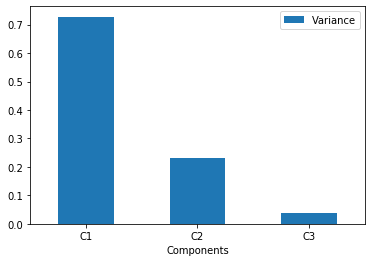

In [34]:
pd.DataFrame({'Components':['C1','C2', 'C3'],'Variance':pca.explained_variance_ratio_}).plot.bar(x='Components',y='Variance',rot=0);

### Note:

<b>explained_variance_ratio</b> is used to determine the number of principal components that sufficiently provides the information contained in the original feature.

PCA doesn’t work well on high dimensional sparse matrix due to computational constraints resulting in a memory error issue. 

In such cases, TruncatedSVD can be used.

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Z = pca.fit_transform(x1)
print(Z.shape)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum()*100)

(150, 3)
[0.72770452 0.23030523 0.03683832]
99.48480731910938


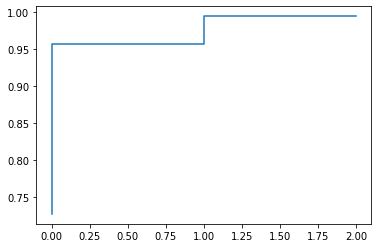

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

exp_var_cum=np.cumsum(pca.explained_variance_ratio_)
plt.step(range(exp_var_cum.size), exp_var_cum)

### Singular-Value Decomposition


The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix.

Applications of Singular Value Decomposition (SVD)

            Search Engines
            
            Image Compression

            Image Recovery

            Eigenfaces

            Spectral Clustering

            Background Removal from Videos

### SVD example 

In [41]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = array([[1, 2], [3, 4], [5, 6]])
print("Original Matrix:\n")
print(A)

svd =  TruncatedSVD(n_components = 1)
A_transf = svd.fit_transform(A)

print("Singular values:\n")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 1 features:\n")
print(A_transf)

Original Matrix:

[[1 2]
 [3 4]
 [5 6]]
Singular values:

[9.52551809]
Transformed Matrix after reducing to 1 features:

[[2.18941839]
 [4.99846626]
 [7.80751414]]


### SVD on Iris data

In [42]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 
            'petal width']
# Separating out the features
x = df.loc[:, features].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [44]:
# Separating out the target
y = df.loc[:,['target']].values
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [45]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

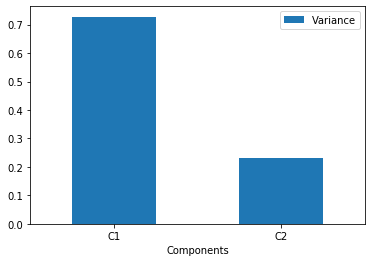

In [47]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=2) 
svd.fit_transform(x); 
pd.DataFrame({'Components':['C1','C2'],'Variance':svd.explained_variance_ratio_}).plot.bar(x='Components',y='Variance',rot=0);

### LDA on IRIS data

LDA is a supervised linear transformation technique. While mapping the high dimensional feature to the lower dimension, 

it tries to preserve as much discriminatory power as possible for the dependent variable. 

As LDA takes the dependent variable into consideration, it may give biased results if the data is not normally distributed.

In LDA, feature scaling does not affect the result of an LDA. So feature scaling is optional.

In [48]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 
            'petal width']
# Separating out the features
x = df.loc[:, features].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
# Separating out the target
y = df.loc[:,['target']].values
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [51]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) # Test_size-0.2 

In [53]:
X_train

array([[ 6.74501145e-01,  1.06445364e-01,  9.90221459e-01,
         7.90590793e-01],
       [-5.37177559e-01, -1.24957601e-01,  4.21564419e-01,
         3.96171883e-01],
       [-7.79513300e-01,  1.03205722e+00, -1.28440670e+00,
        -1.31297673e+00],
       [ 3.10997534e-01, -1.24957601e-01,  6.49027235e-01,
         7.90590793e-01],
       [ 6.74501145e-01, -5.87763531e-01,  1.04708716e+00,
         1.31648267e+00],
       [-7.79513300e-01, -8.19166497e-01,  8.03701950e-02,
         2.64698913e-01],
       [-1.73673948e-01,  1.72626612e+00, -1.17067529e+00,
        -1.18150376e+00],
       [ 1.89829664e-01, -8.19166497e-01,  7.62758643e-01,
         5.27644853e-01],
       [ 6.86617933e-02, -1.24957601e-01,  2.50967307e-01,
         3.96171883e-01],
       [-5.25060772e-02, -1.05056946e+00,  1.37235899e-01,
         1.75297293e-03],
       [ 1.15917263e+00, -1.24957601e-01,  9.90221459e-01,
         1.18500970e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
      

In [54]:
y_train

array([['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
    

In [55]:
import warnings
warnings.filterwarnings('ignore')

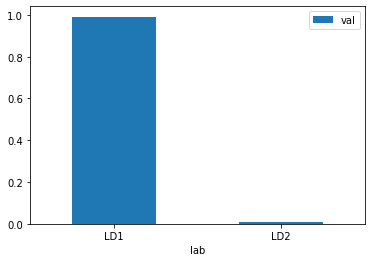

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda  = LDA(n_components=2)
X_new = lda.fit_transform(X_train,y_train)
pd.DataFrame({'lab':['LD1','LD2'],'val':lda.explained_variance_ratio_}).plot.bar(x='lab',y='val',rot=0);

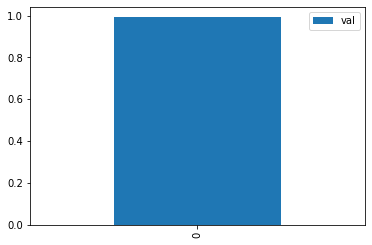

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda  = LDA(n_components=1)
X_new = lda.fit_transform(X_train,y_train)
pd.DataFrame({'lab':['LD1'],'val':lda.explained_variance_ratio_}).plot.bar();